## Observations and Insights 

Regimens "Ramicane" and "Capomulin" treated mouse had the lowest median Tumor Volume, hence could be considered most effective treatment.
Looking at Tumor Volume VS Timepoint of Mouse s185 treated with Capomulin, Tumor Volume decreases with time for the mouse treated with Capomulin.
Looking at Tumor Volume VS Mouse Weight For Capomulin Regimen, it can be observed that weight has a possitive corelation with Tumor Volume. 

In [201]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata,study_results,how="left", on="Mouse ID")
mouse_study_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [202]:
# Checking the number of mice.
len(mouse_study_df.groupby(["Mouse ID"])["Drug Regimen"].count())


249

In [203]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df[mouse_study_df.duplicated(keep='first')]
mouse_study_dupl_df = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'],keep='first')]
mouse_study_dupl_df[['Mouse ID','Timepoint']]
# mouse_study_dupl_df['Mouse ID'].unique()

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [204]:
# Optional: Get all the data for the duplicate mouse ID. 
dupl_data_df = mouse_study_df[mouse_study_df["Mouse ID"].isin(mouse_study_dupl_df['Mouse ID'].unique())]
dupl_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [205]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study_clean_df = mouse_study_df[~mouse_study_df["Mouse ID"].isin(mouse_study_dupl_df['Mouse ID'].unique())]
mouse_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [206]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_clean_df.groupby(["Mouse ID"])["Drug Regimen"].count())

248

## Summary Statistics

In [207]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# mean
mouse_study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

# median
mouse_study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()

# variance
mouse_study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

# standard deviation
mouse_study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

# SEM
mouse_study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_stat_df = pd.DataFrame({"mean": mouse_study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean(),
                               "median" : mouse_study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median(),
                               "variance" : mouse_study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var(),
                               "standard deviation" : mouse_study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std(),
                               "SEM" : mouse_study_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()})
summary_stat_df

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [208]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stat_df = mouse_study_clean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(["mean","median","var","std","sem"])
summary_stat_df
# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

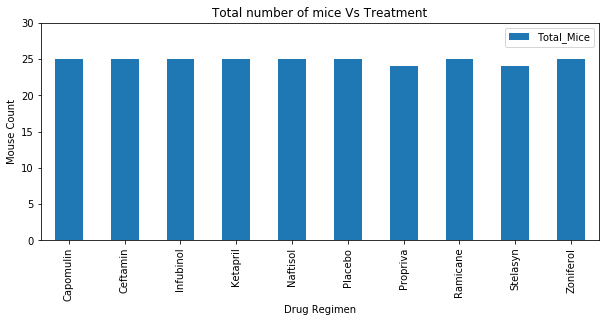

In [209]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

df1 = mouse_study_clean_df[["Mouse ID","Drug Regimen"]]
df1 = df1.drop_duplicates(["Mouse ID","Drug Regimen"],keep= 'last')
df1 = df1.groupby(["Drug Regimen"]).count()
df1 = df1.rename(columns = {"Mouse ID":"Total_Mice"})

ax = df1.plot.bar(rot=90,figsize=(10,4),ylim=(0,30))
ax.set_ylabel('Mouse Count')
ax.set_title('Total number of mice Vs Treatment')
ax.legend(loc=1)  

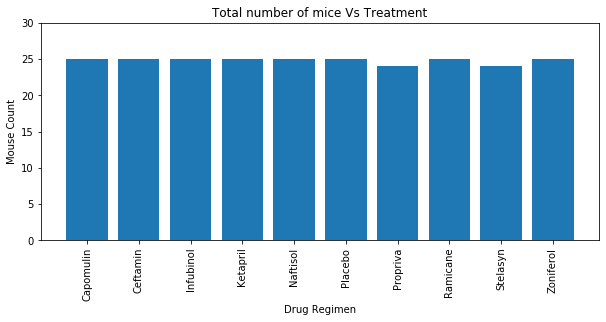

In [210]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

df1 = df1.reset_index()
fig, ax = plt.subplots(figsize=(10,4))
ax.set_ylabel('Mouse Count')
ax.set_xlabel('Drug Regimen')
plt.bar(df1["Drug Regimen"],df1["Total_Mice"])
plt.xticks(rotation='vertical')
plt.ylim(0,30)
plt.title("Total number of mice Vs Treatment")
plt.show()

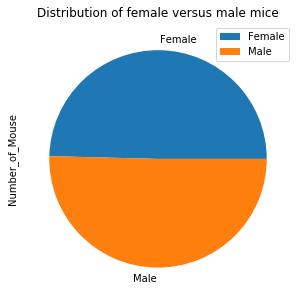

In [211]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender_df = mouse_study_clean_df[['Mouse ID','Sex']]
mouse_gender_df = mouse_gender_df.drop_duplicates(keep = 'first')
mouse_gender_count_df = mouse_gender_df.groupby(['Sex']).count()
mouse_gender_count_df = mouse_gender_count_df.rename(columns = {'Mouse ID': 'Number_of_Mouse'})
# plot = mouse_gender_count_df.plot.pie(y='Mouse ID', figsize=(5, 5))
plot = mouse_gender_count_df.plot(kind = "pie" ,y='Number_of_Mouse', figsize=(5, 5), title ="Distribution of female versus male mice" )

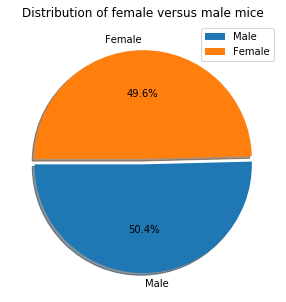

In [212]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = mouse_gender_df['Sex'].unique()

# The values of each section of the pie chart
sizes = mouse_gender_df['Sex'].value_counts()

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.05, 0)
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=180)
ax.set_title("Distribution of female versus male mice")
ax.legend(labels, loc="best")
plt.show()

## Quartiles, Outliers and Boxplots

In [213]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df1 = mouse_study_clean_df[["Drug Regimen","Mouse ID","Timepoint", "Tumor Volume (mm3)"]]
# define a list of treatment regimens needs to be filtered
drug_filter = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
df1 = df1[df1["Drug Regimen"].isin(drug_filter)]

# Start by getting the last (greatest) timepoint for each mouse
# sort the df1 based on Drug Regimen,Mouse ID, Timepoint then remove duplicates based on Drug Regimen,Mouse ID keeping the last instance
df1 = df1.sort_values(by=["Drug Regimen","Mouse ID","Timepoint"])
df1 = df1.drop_duplicates(subset = {"Drug Regimen","Mouse ID"},keep = "last")
df1.head()


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
309,Capomulin,b128,45,38.982878
299,Capomulin,b742,45,38.939633
64,Capomulin,f966,20,30.485985
244,Capomulin,g288,45,37.074024
360,Capomulin,g316,45,40.159220


In [214]:
# treatment list for labels

treatment_list = df1["Drug Regimen"].unique()
tumor_volumeDic = {}

for treatment in treatment_list:
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    tumor_volumeDic.update({f"{treatment}" : df1.loc[df1["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]}) 
    quartiles = df1.loc[df1["Drug Regimen"] == treatment]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_df = df1.loc[df1["Drug Regimen"] == treatment]
    outliers_df = outliers_df.loc[(outliers_df["Tumor Volume (mm3)"] < lower_bound) | (outliers_df["Tumor Volume (mm3)"] > upper_bound)]
    print(f"Treatment : {treatment} Lower bound :{lower_bound} , Upper bound :{upper_bound} ")

Treatment : Capomulin Lower bound :20.70456164999999 , Upper bound :51.83201549 
Treatment : Ceftamin Lower bound :25.355449580000002 , Upper bound :87.66645829999999 
Treatment : Infubinol Lower bound :36.83290494999999 , Upper bound :82.74144559000001 
Treatment : Ramicane Lower bound :17.912664470000003 , Upper bound :54.30681135 


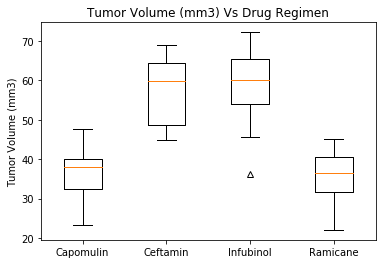

In [215]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
x0 = tumor_volumeDic[treatment_list[0]]
x1 = tumor_volumeDic[treatment_list[1]]
x2 = tumor_volumeDic[treatment_list[2]]
x3 = tumor_volumeDic[treatment_list[3]]

data = [x0, x1, x2, x3]
fig, ax = plt.subplots()
ax.set_title('Tumor Volume (mm3) Vs Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(data,labels = treatment_list,  sym='^')
plt.show()

## Line and Scatter Plots

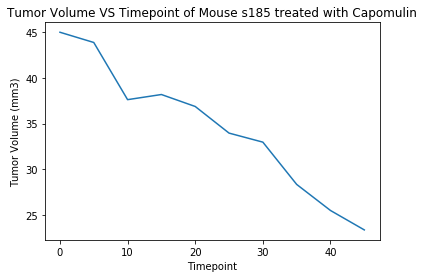

In [216]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_df =mouse_study_clean_df.loc[(mouse_study_clean_df["Drug Regimen"] == "Capomulin") & (mouse_study_clean_df["Mouse ID"] == "s185")][["Timepoint","Tumor Volume (mm3)"]]

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(s185_df["Timepoint"], s185_df["Tumor Volume (mm3)"])
plt.title("Tumor Volume VS Timepoint of Mouse s185 treated with Capomulin")
plt.show()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


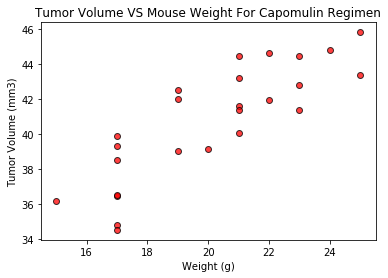

In [217]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df2 = mouse_study_clean_df.loc[mouse_study_clean_df["Drug Regimen"] == "Capomulin"][["Mouse ID","Weight (g)","Tumor Volume (mm3)"]].groupby(["Mouse ID"]).mean()
plt.scatter(df2["Weight (g)"], df2["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume VS Mouse Weight For Capomulin Regimen")
df2

## Correlation and Regression

In [218]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = df2["Weight (g)"]
y_values = df2["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


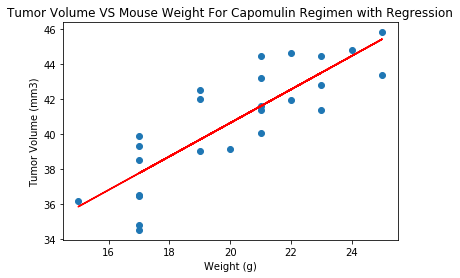

In [219]:

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume VS Mouse Weight For Capomulin Regimen with Regression")
plt.show()

Observations - Top levlel Summary
Regimens "Ramicane" and "Capomulin" treated mouse had the lowest median Tumor Volume, hence could be considered most effective treatment.
Looking at Tumor Volume VS Timepoint of Mouse s185 treated with Capomulin, Tumor Volume decreases with time for the mouse treated with Capomulin.
Looking at Tumor Volume VS Mouse Weight For Capomulin Regimen, it can be observed that weight has a possitive corelation with Tumor Volume. 
